# K-Means Clustering without Hyperparameter Optimization

c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Confusion Matrix (Training Set):
 [[     0      0      0      0      0]
 [237514 428891 121616   1669      0]
 [335503 376776  72890   4521      0]
 [295035 460964  28726   4965      0]
 [483172 291023  14336   1159      0]]
Adjusted Rand Index (Training Set): 0.0243
Sum of Squared Error (Training Set): 52123614.2324
Confusion Matrix (Test Set):
 [[     0      0      0      0      0]
 [  2170   4450   2496    151      0]
 [318807 399860 104380   7609      0]
 [ 63326  98727   6158   1009      0]
 [ 12431  11050   1546    194      0]]
Adjusted Rand Index (Test Set): -0.0204


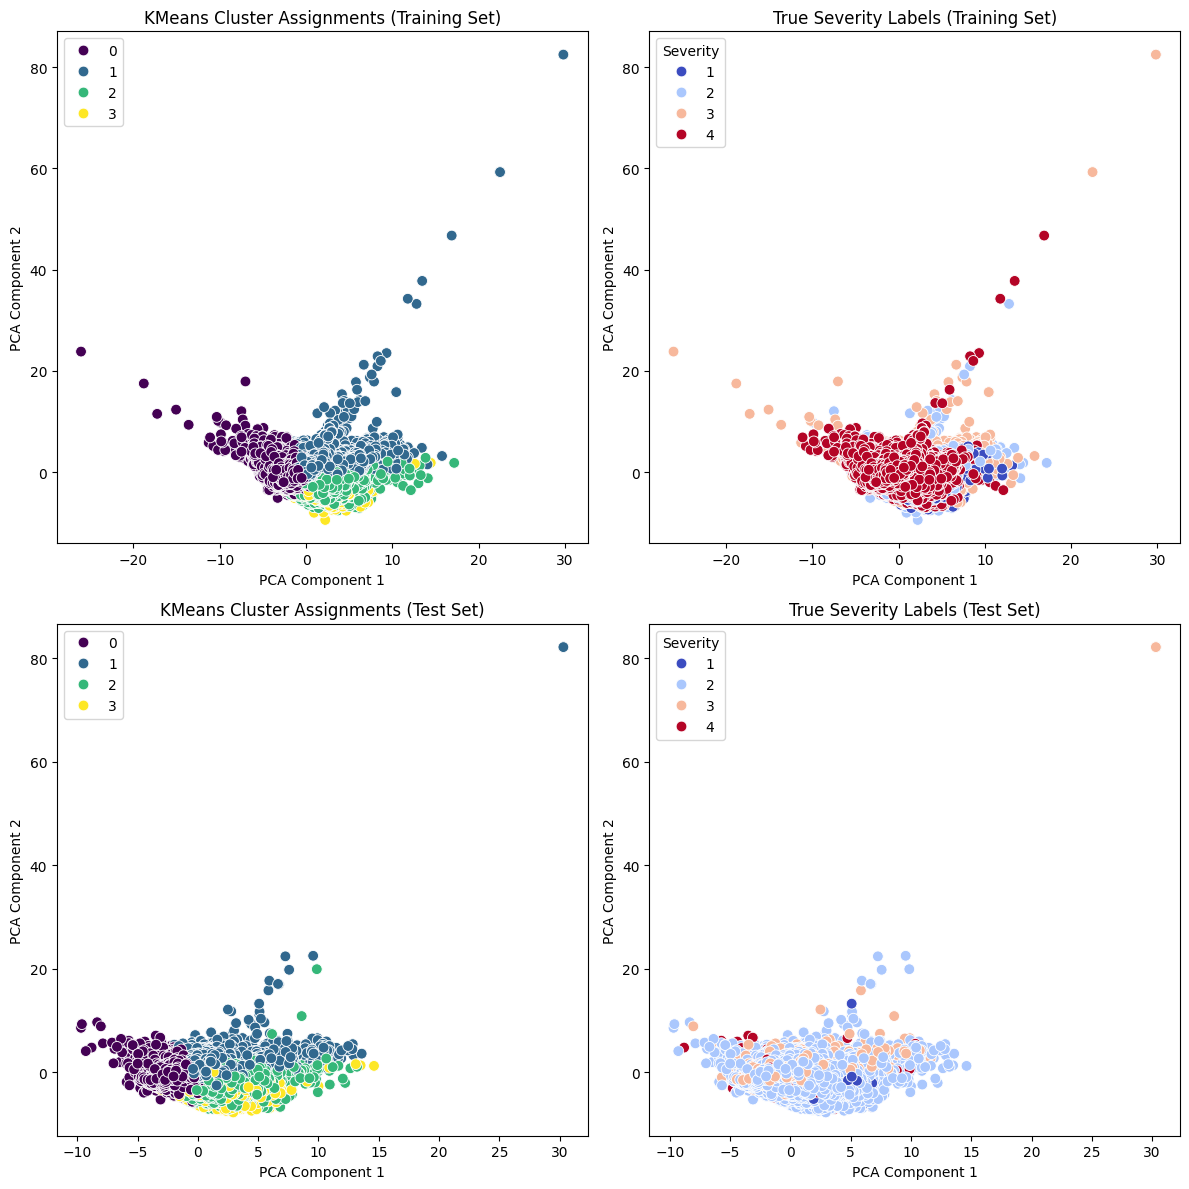

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from sklearn.decomposition import PCA

# Load the training data
train_data = pd.read_csv("Train_Set.csv")

# Define features and target variable for training
X_train = train_data.drop(columns=["Severity"])  # All columns except 'Severity'
y_train = train_data["Severity"]  # Target variable 'Severity'

# Train the KMeans model
n_clusters = 4  # Since 'Severity' has values from 1 to 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_train)

# Analyze the training results
train_cluster_labels = kmeans.labels_
conf_matrix_train = confusion_matrix(y_train, train_cluster_labels)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)

# Calculate Adjusted Rand Index (ARI) for the training set
ari_train = adjusted_rand_score(y_train, train_cluster_labels)
print(f"Adjusted Rand Index (Training Set): {ari_train:.4f}")

# Calculate Sum of Squared Error (SSE) for the training set
sse_train = kmeans.inertia_
print(f"Sum of Squared Error (Training Set): {sse_train:.4f}")

# Load the test data
test_data = pd.read_csv("Test_Set.csv")

# Define features and target variable for testing
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Predict cluster labels for the test set
test_cluster_labels = kmeans.predict(X_test)

# Compare predictions with actual labels using confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_cluster_labels)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

# Calculate Adjusted Rand Index (ARI) for the test set
ari_test = adjusted_rand_score(y_test, test_cluster_labels)
print(f"Adjusted Rand Index (Test Set): {ari_test:.4f}")

# Calculate Sum of Squared Error (SSE) for the test set
# SSE for test set is not directly available from the trained model.
# Calculate it manually as the sum of squared distances to the closest cluster centers.
# sse_test = sum((X_test - kmeans.cluster_centers_[test_cluster_labels])**2).sum()
# print(f"Sum of Squared Error (Test Set): {sse_test:.4f}")

# Visualize results using PCA for both train and test sets
pca = PCA(n_components=2)

# Reduce dimensions for the training set
X_train_pca = pca.fit_transform(X_train)

# Reduce dimensions for the test set
X_test_pca = pca.transform(X_test)

# Plot the clustering results
plt.figure(figsize=(12, 12))

# Plot clusters from the training set
plt.subplot(2, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_cluster_labels, palette="viridis", s=60)
plt.title("KMeans Cluster Assignments (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot true Severity labels from the training set
plt.subplot(2, 2, 2)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", s=60)
plt.title("True Severity Labels (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot clusters from the test set
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_cluster_labels, palette="viridis", s=60)
plt.title("KMeans Cluster Assignments (Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot true Severity labels from the test set
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette="coolwarm", s=60)
plt.title("True Severity Labels (Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

# K-Means Clustering with Hyperparameter Optimization

Confusion Matrix (Training Set):
 [[     0      0      0      0      0]
 [237514 428891 121616   1669      0]
 [335503 376776  72890   4521      0]
 [295035 460964  28726   4965      0]
 [483172 291023  14336   1159      0]]
Adjusted Rand Index (Training Set): 0.0243
Sum of Squared Error (Training Set): 52123614.2324
Confusion Matrix (Test Set):
 [[     0      0      0      0      0]
 [  2170   4450   2496    151      0]
 [318807 399860 104380   7609      0]
 [ 63326  98727   6158   1009      0]
 [ 12431  11050   1546    194      0]]
Adjusted Rand Index (Test Set): -0.0204


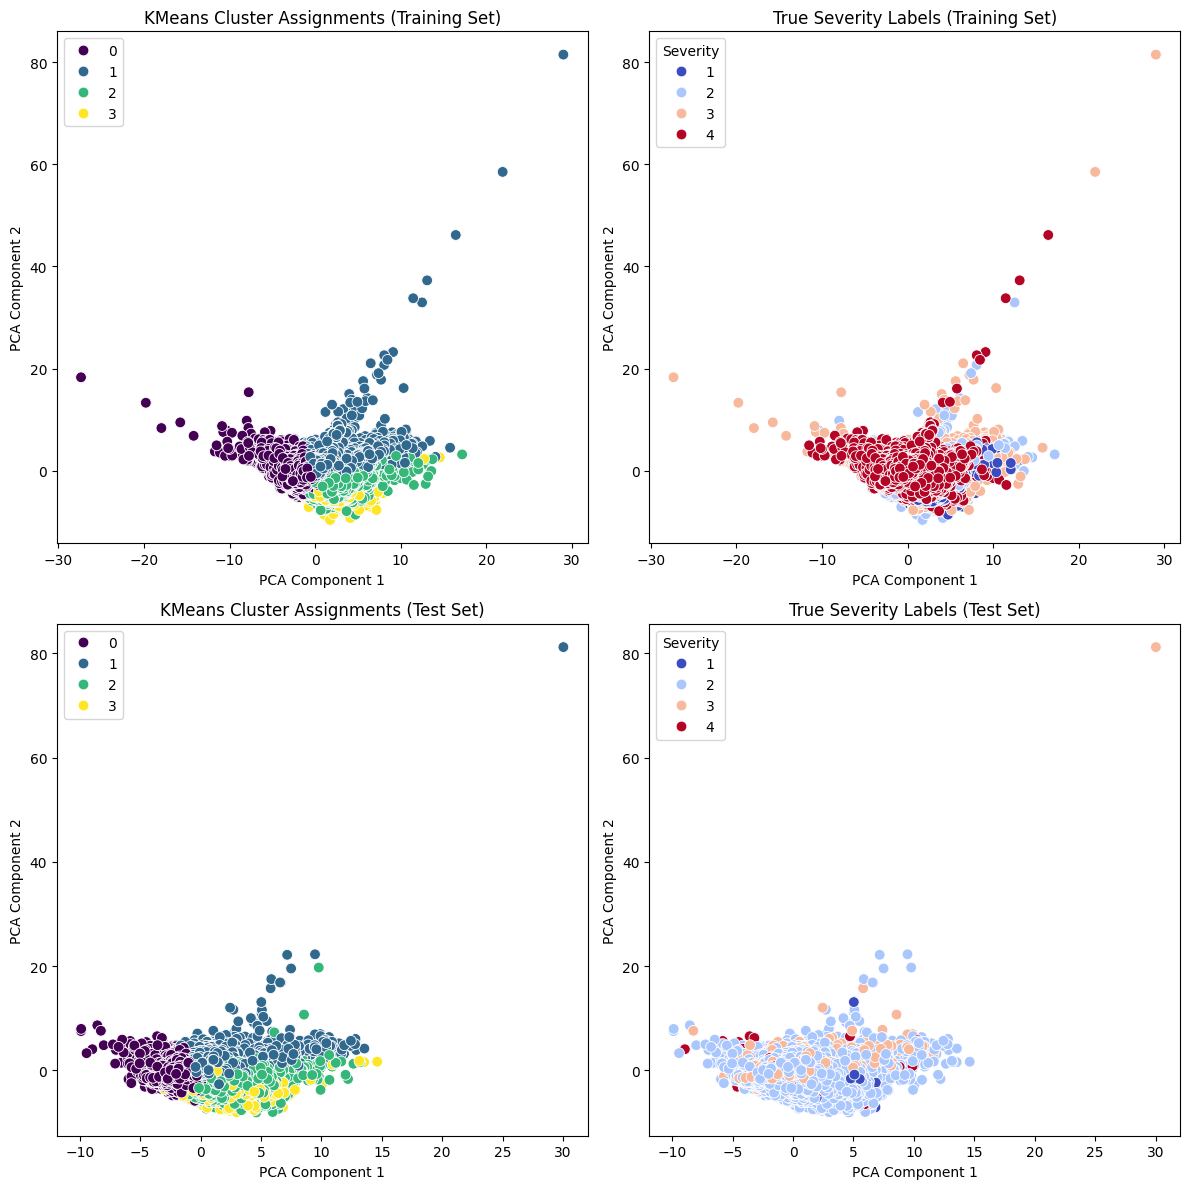

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from sklearn.decomposition import PCA

# Load the training data
train_data = pd.read_csv("Train_Set.csv")

# Define features and target variable for training
X_train = train_data.drop(columns=["Severity"])  # All columns except 'Severity'
y_train = train_data["Severity"]  # Target variable 'Severity'

# Optimize KMeans clustering with multiple random restarts
n_clusters = 4  # Since 'Severity' has values from 1 to 4
n_init = 10  # Number of random initializations
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
kmeans.fit(X_train)

# Analyze the training results
train_cluster_labels = kmeans.labels_
conf_matrix_train = confusion_matrix(y_train, train_cluster_labels)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)

# Calculate Adjusted Rand Index (ARI) for the training set
ari_train = adjusted_rand_score(y_train, train_cluster_labels)
print(f"Adjusted Rand Index (Training Set): {ari_train:.4f}")

# Calculate Sum of Squared Error (SSE) for the training set
sse_train = kmeans.inertia_
print(f"Sum of Squared Error (Training Set): {sse_train:.4f}")

# Load the test data
test_data = pd.read_csv("Test_Set.csv")

# Define features and target variable for testing
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Predict cluster labels for the test set
test_cluster_labels = kmeans.predict(X_test)

# Compare predictions with actual labels using confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_cluster_labels)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

# Calculate Adjusted Rand Index (ARI) for the test set
ari_test = adjusted_rand_score(y_test, test_cluster_labels)
print(f"Adjusted Rand Index (Test Set): {ari_test:.4f}")

# Calculate Sum of Squared Error (SSE) for the test set
# sse_test = sum((X_test - kmeans.cluster_centers_[test_cluster_labels])**2).sum()
# print(f"Sum of Squared Error (Test Set): {sse_test:.4f}")

# Visualize results using PCA for both train and test sets
pca = PCA(n_components=2)

# Reduce dimensions for the training set
X_train_pca = pca.fit_transform(X_train)

# Reduce dimensions for the test set
X_test_pca = pca.transform(X_test)

# Plot the clustering results
plt.figure(figsize=(12, 12))

# Plot clusters from the training set
plt.subplot(2, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_cluster_labels, palette="viridis", s=60)
plt.title("KMeans Cluster Assignments (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot true Severity labels from the training set
plt.subplot(2, 2, 2)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", s=60)
plt.title("True Severity Labels (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot clusters from the test set
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_cluster_labels, palette="viridis", s=60)
plt.title("KMeans Cluster Assignments (Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot true Severity labels from the test set
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette="coolwarm", s=60)
plt.title("True Severity Labels (Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

# DBSCAN without Hyperparameter Optimization

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from sklearn.decomposition import PCA
import numpy as np

# Load the training data
train_data = pd.read_csv("Train_Set.csv")

# Define features and target variable for training
X_train = train_data.drop(columns=["Severity"])  # All columns except 'Severity'
y_train = train_data["Severity"]  # Target variable 'Severity'

# DBSCAN clustering (adjust parameters as needed)
eps = 0.5  # Maximum distance between two samples for them to be in the same neighborhood
min_samples = 5  # Minimum number of points to form a dense region
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_train)

# Analyze the training results
train_cluster_labels = dbscan.labels_  # Cluster labels; -1 indicates noise
unique_clusters_train = len(set(train_cluster_labels)) - (1 if -1 in train_cluster_labels else 0)
print(f"Number of clusters found (Training Set): {unique_clusters_train}")

# Calculate Adjusted Rand Index (ARI) for the training set
ari_train = adjusted_rand_score(y_train, train_cluster_labels)
print(f"Adjusted Rand Index (Training Set): {ari_train:.4f}")

# Calculate Sum of Squared Error (SSE) for the training set
# For DBSCAN, SSE can be computed by summing the squared distances to the cluster center (ignoring noise points)
cluster_centers_train = np.array(
    [X_train[train_cluster_labels == cluster].mean(axis=0) for cluster in set(train_cluster_labels) if cluster != -1]
)
sse_train = sum(
    np.linalg.norm(X_train[train_cluster_labels == cluster] - cluster_centers_train[cluster_idx], axis=1).sum()
    for cluster_idx, cluster in enumerate(set(train_cluster_labels))
    if cluster != -1
)
print(f"Sum of Squared Error (Training Set): {sse_train:.4f}")

# Load the test data
test_data = pd.read_csv("Test_Set.csv")

# Define features and target variable for testing
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Predict cluster labels for the test set
# DBSCAN does not support predicting new data directly, so we assign labels based on nearest clusters
test_cluster_labels = -1 * np.ones(len(X_test))  # Initialize all labels as noise (-1)
for cluster in set(train_cluster_labels):
    if cluster != -1:
        cluster_center = X_train[train_cluster_labels == cluster].mean(axis=0)
        cluster_distances = np.linalg.norm(X_test - cluster_center, axis=1)
        cluster_mask = (test_cluster_labels == -1) & (cluster_distances < eps)  # Assign to the closest valid cluster
        test_cluster_labels[cluster_mask] = cluster

# Calculate Adjusted Rand Index (ARI) for the test set
ari_test = adjusted_rand_score(y_test, test_cluster_labels)
print(f"Adjusted Rand Index (Test Set): {ari_test:.4f}")

# Calculate Sum of Squared Error (SSE) for the test set
# Using the same cluster centers as in training
sse_test = sum(
    np.linalg.norm(X_test[test_cluster_labels == cluster] - cluster_centers_train[cluster_idx], axis=1).sum()
    for cluster_idx, cluster in enumerate(set(test_cluster_labels))
    if cluster != -1
)
print(f"Sum of Squared Error (Test Set): {sse_test:.4f}")

# Visualize results using PCA for both train and test sets
pca = PCA(n_components=2)

# Reduce dimensions for the training set
X_train_pca = pca.fit_transform(X_train)

# Reduce dimensions for the test set
X_test_pca = pca.transform(X_test)

# Plot the clustering results
plt.figure(figsize=(12, 12))

# Plot clusters from the training set
plt.subplot(2, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_cluster_labels, palette="viridis", s=60)
plt.title("DBSCAN Cluster Assignments (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot true Severity labels from the training set
plt.subplot(2, 2, 2)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", s=60)
plt.title("True Severity Labels (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot clusters from the test set
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_cluster_labels, palette="viridis", s=60)
plt.title("DBSCAN Cluster Assignments (Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot true Severity labels from the test set
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette="coolwarm", s=60)
plt.title("True Severity Labels (Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

# DBSCAN with Hyperparameter Optimization

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# Load the training data
train_data = pd.read_csv("Train_Set.csv")

# Define features and target variable for training
X_train = train_data.drop(columns=["Severity"])  # All columns except 'Severity'
y_train = train_data["Severity"]  # Target variable 'Severity'

# Define the parameter space for Random Search
n_iterations = 10  # Number of random configurations to try
eps_values = np.random.uniform(0.1, 1.0, n_iterations)  # Random values for eps between 0.1 and 1.0
min_samples_values = np.random.randint(2, 20, n_iterations)  # Random values for min_samples between 2 and 20

# Initialize variables to track the best model
best_eps = None
best_min_samples = None
best_score = -1
best_model = None

# Random Search over the parameter space
print("Random Search for DBSCAN hyperparameters:\n")
for eps, min_samples in zip(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_train)
    
    # Ignore cases where all points are noise or only one cluster is formed
    if len(set(labels)) > 1 and -1 in labels:
        score = silhouette_score(X_train, labels)  # Evaluate clustering quality
        print(f"eps={eps:.2f}, min_samples={min_samples}, Silhouette Score={score:.4f}")
        if score > best_score:
            best_eps = eps
            best_min_samples = min_samples
            best_score = score
            best_model = dbscan

print("\nRandom Search completed.")
print(f"Best parameters: eps={best_eps:.2f}, min_samples={best_min_samples}, Silhouette Score={best_score:.4f}")

# Apply the best DBSCAN model to the training data
best_labels_train = best_model.labels_

# Calculate Adjusted Rand Index (ARI) for the training set
ari_train = adjusted_rand_score(y_train, best_labels_train)
print(f"Adjusted Rand Index (Training Set): {ari_train:.4f}")

# Visualize the clustering results for the training set using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(12, 6))

# Plot clusters based on DBSCAN labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=best_labels_train, palette="viridis", s=60)
plt.title("DBSCAN Cluster Assignments (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot actual Severity values for comparison
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", s=60)
plt.title("True Severity Labels (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

# Load the test data
test_data = pd.read_csv("Test_Set.csv")

# Define features and target variable for testing
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Predict cluster labels for the test set
# DBSCAN does not support predicting new data directly, so we assign labels based on nearest clusters
test_labels = -1 * np.ones(len(X_test))  # Initialize all labels as noise (-1)
for cluster in set(best_labels_train):
    if cluster != -1:
        cluster_center = X_train[best_labels_train == cluster].mean(axis=0)
        cluster_distances = np.linalg.norm(X_test - cluster_center, axis=1)
        cluster_mask = (test_labels == -1) & (cluster_distances < best_eps)  # Assign to the closest valid cluster
        test_labels[cluster_mask] = cluster

# Calculate Adjusted Rand Index (ARI) for the test set
ari_test = adjusted_rand_score(y_test, test_labels)
print(f"Adjusted Rand Index (Test Set): {ari_test:.4f}")

# Visualize the clustering results for the test set using PCA
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(12, 6))

# Plot clusters based on DBSCAN labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_labels, palette="viridis", s=60)
plt.title("DBSCAN Cluster Assignments (Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot actual Severity values for comparison
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette="coolwarm", s=60)
plt.title("True Severity Labels (Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

Random Search for DBSCAN hyperparameters:



KeyboardInterrupt: 